# <strong>EDA:</strong> Exploratory Data Analysis

**Name:** Arsalan Ali<br>
**Email:** arslanchaos@gmail.com

---

### **Table of Contents**
* Uni-variate Analysis (One variable)
    * Categorical
    * Numerical
* Bi-variate / Multi-variate Analysis 
    * Scatterplot (Numerical - Numerical)
    * Bar Plot (Numerical - Categorical)
    * Box Plot (Numerical - Categorical)
    * Displot (Numerical - Categorical)
    * Heatmap (Categorical - Categorical)
    * ClusterMap (Categorical - Categorical)
    * Line Plot (Numerical - Numerical)
    * Pairplot (Numerical - Numerical)

---

## **Uni-variate**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **1- Categorical Data**

#### 1.1 Count Plot

0    549
1    342
Name: survived, dtype: int64

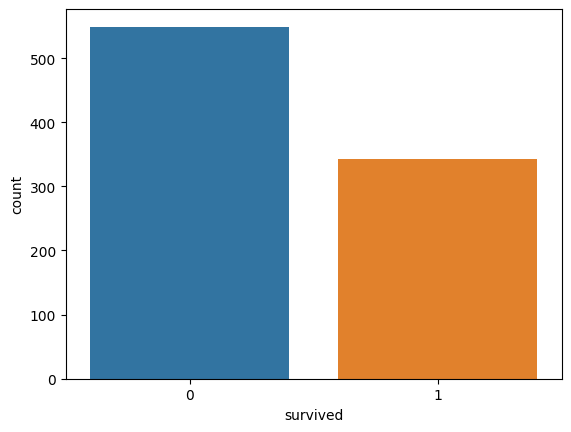

In [22]:
sns.countplot(x=titanic["survived"])
titanic["survived"].value_counts()
# titanic["survived"].value_counts().plot(kind="bar")

#### 1.2 Pie Chart

<AxesSubplot: ylabel='sex'>

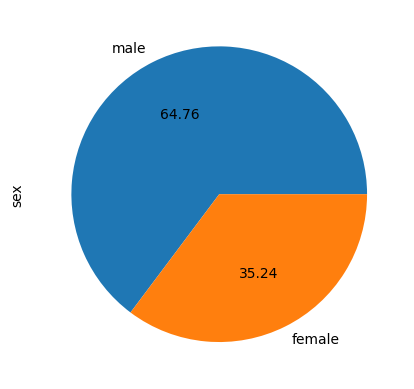

In [30]:
titanic["sex"].value_counts().plot(kind="pie", autopct="%.2f")

### **2- Numerical Data**

#### 2.1 Histogram

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

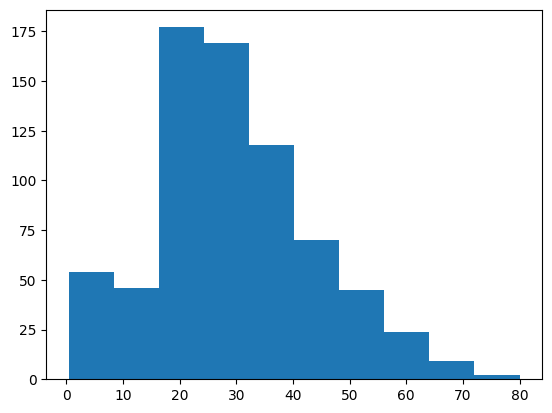

In [40]:
# sns.histplot(x=titanic["age"], bins=10)
plt.hist(titanic["age"], bins=10)

#### 2.2 Distplot
Kernel density estimation or KDE is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset. 

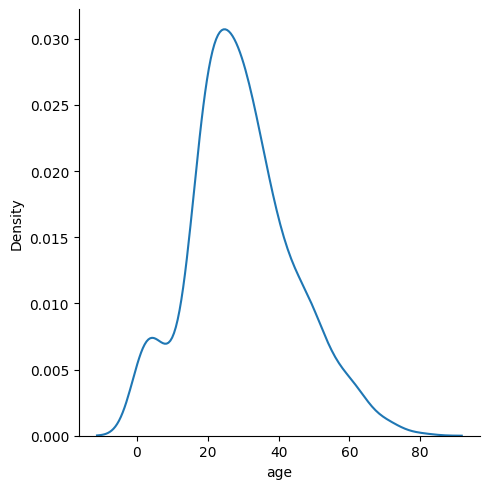

In [43]:
sns.displot(titanic["age"], kind="kde")

#### 2.3 Boxplot
It shows five number summary in terms of quartiles: Min, Max, Q1, Q2, Q3 
* Q1 (Quartile 1)
* Q2 (Median / Quartile 2)
* Q3 (Quartile 3)
* Interquartile Range (Q3 - Q1 = IQR)
* Minimum = Q1 - 1.5*IQR
* Maximum = Q1 + 1.5*IQR
* Anything below Minimum or above Maximum is an Outlier

<AxesSubplot: xlabel='age'>

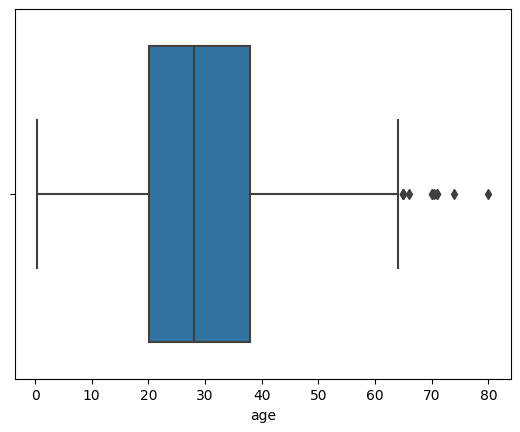

In [46]:
sns.boxplot(x=titanic["age"])

#### 2.4 Skew and Kurtosis

In [58]:
print(f' Skewness: {titanic["age"].skew():.3f} \n Kurtosis: {titanic["age"].kurtosis():.3f}')

 Skewness: 0.389 
 Kurtosis: 0.178


#### 2.5 Summary Statistics

In [56]:
titanic["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

## **Bi-variate and Multi-variate**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [60]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")

### **1- Scatterplot** (Numerical - Numerical)

### Bi-variate (Two variables)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

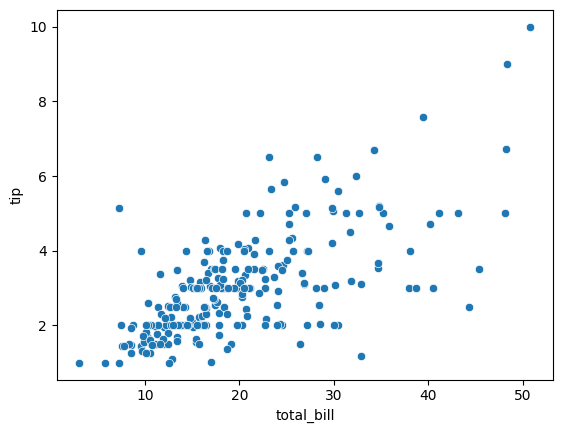

In [61]:
sns.scatterplot(x=tips["total_bill"], y=tips["tip"])

### Multi-variate (More than two variables)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

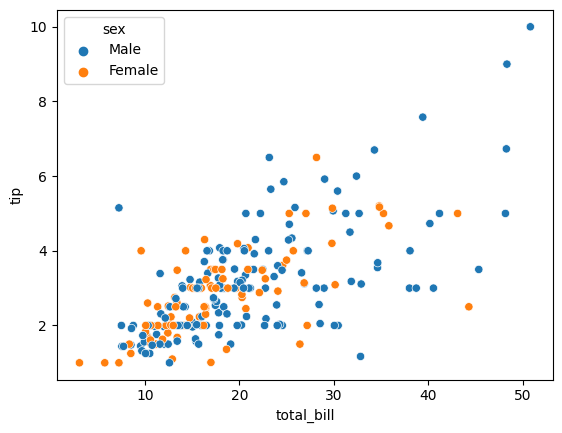

In [62]:
sns.scatterplot(x=tips["total_bill"], y=tips["tip"], hue=tips["sex"])

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

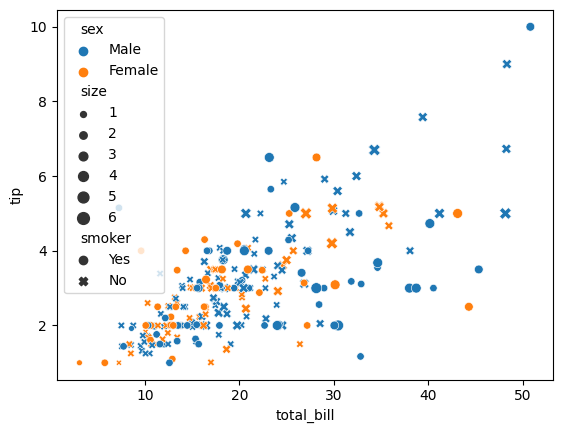

In [64]:
sns.scatterplot(x=tips["total_bill"], y=tips["tip"], hue=tips["sex"], style=tips["smoker"], size=tips["size"])

### **2- Bar Plot** (Numerical - Categorical)

### Bi-variate

<AxesSubplot: xlabel='pclass', ylabel='fare'>

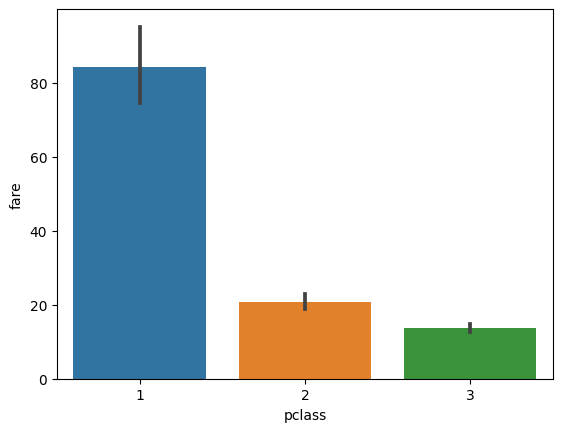

In [66]:
sns.barplot(x=titanic["pclass"], y=titanic["fare"])

### Multi-variate

<AxesSubplot: xlabel='pclass', ylabel='fare'>

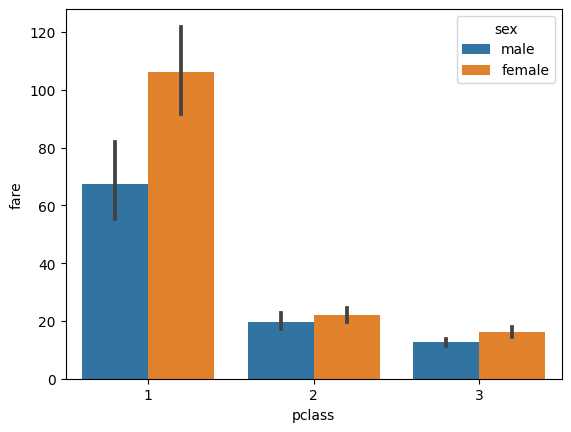

In [67]:
sns.barplot(x=titanic["pclass"], y=titanic["fare"], hue=titanic["sex"])

### **3- Box Plot** (Numerical - Categorical)

### Bi-variate

<AxesSubplot: xlabel='sex', ylabel='age'>

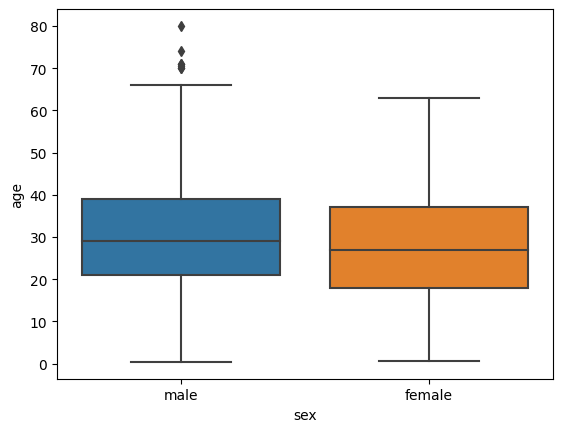

In [68]:
sns.boxplot(x=titanic["sex"], y=titanic["age"])

### Multi-variate

<AxesSubplot: xlabel='sex', ylabel='age'>

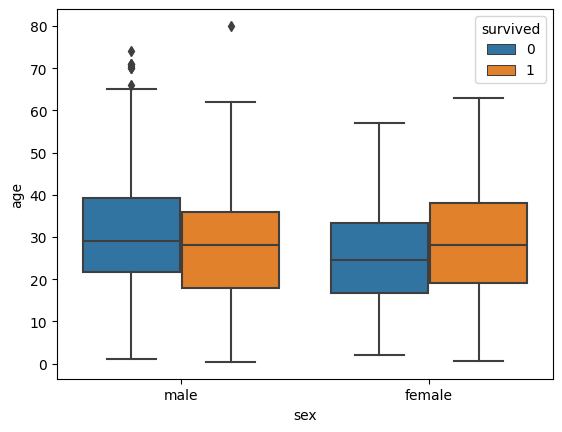

In [69]:
sns.boxplot(x=titanic["sex"], y=titanic["age"], hue=titanic["survived"])

### **4- Displot** (Numerical - Categorical)

### Bi-variate

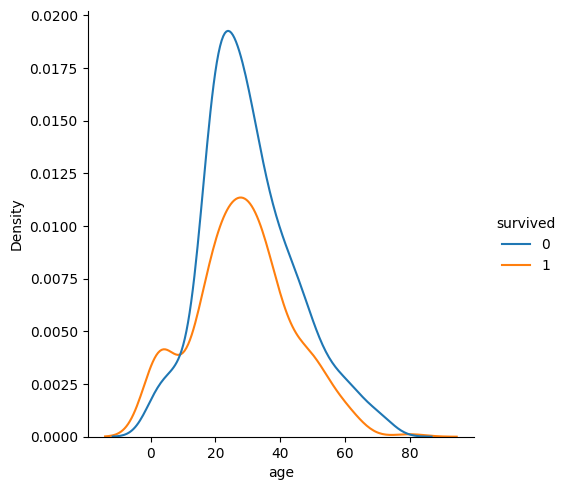

In [75]:
sns.displot(x=titanic["age"], hue=titanic["survived"], kind="kde")

### Multi-variate

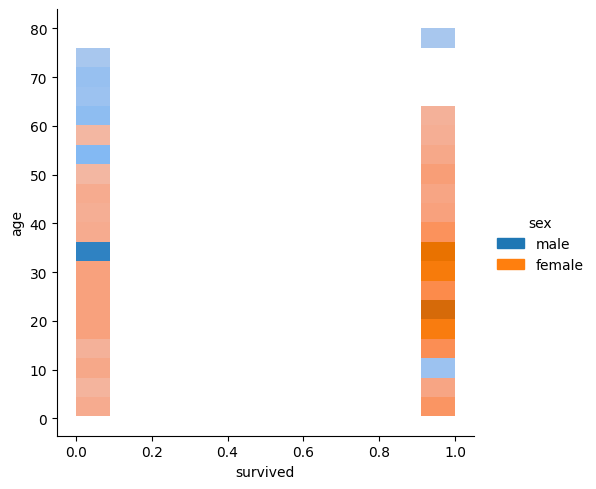

In [91]:
sns.displot(x=titanic["survived"], y=titanic["age"], hue=titanic["sex"])

### **5- HeatMap** (Categorical - Categorical)

### Bi-variate

In [92]:
pd.crosstab(titanic["pclass"], titanic["survived"])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot: xlabel='survived', ylabel='pclass'>

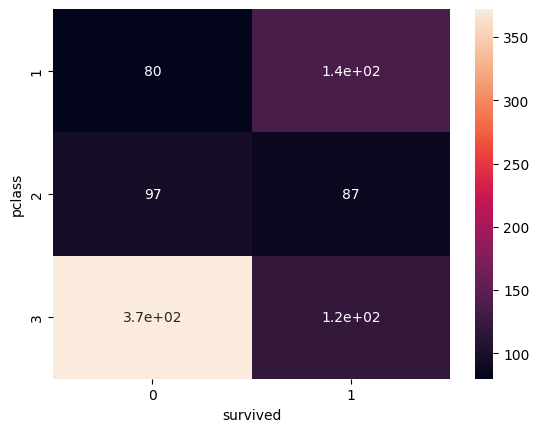

In [94]:
sns.heatmap(pd.crosstab(titanic["pclass"], titanic["survived"]), annot=True)

In [100]:
titanic.groupby("pclass").mean(numeric_only=True)["survived"]*100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

### **6- ClusterMap** (Categorical - Categorical)

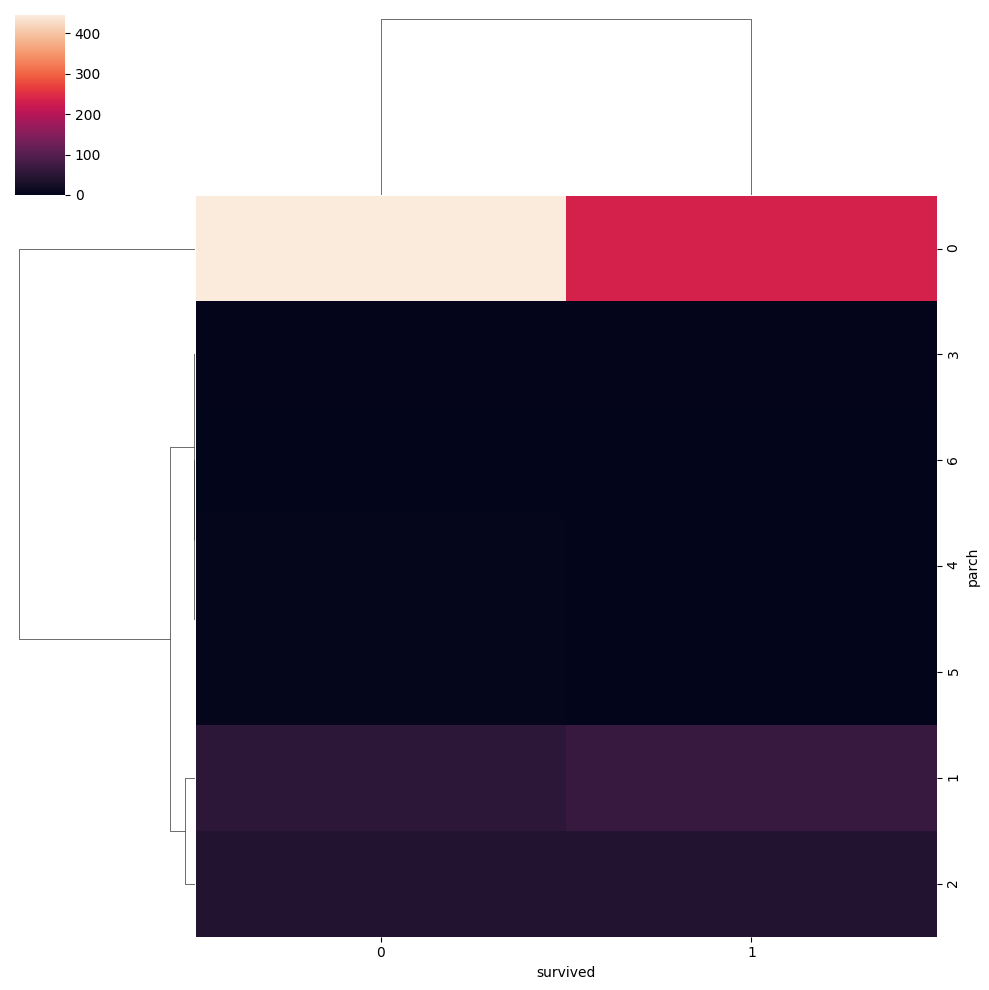

In [102]:
sns.clustermap(pd.crosstab(titanic["parch"], titanic["survived"]))

### **7- Pairplot** (Numerical - Numerical)

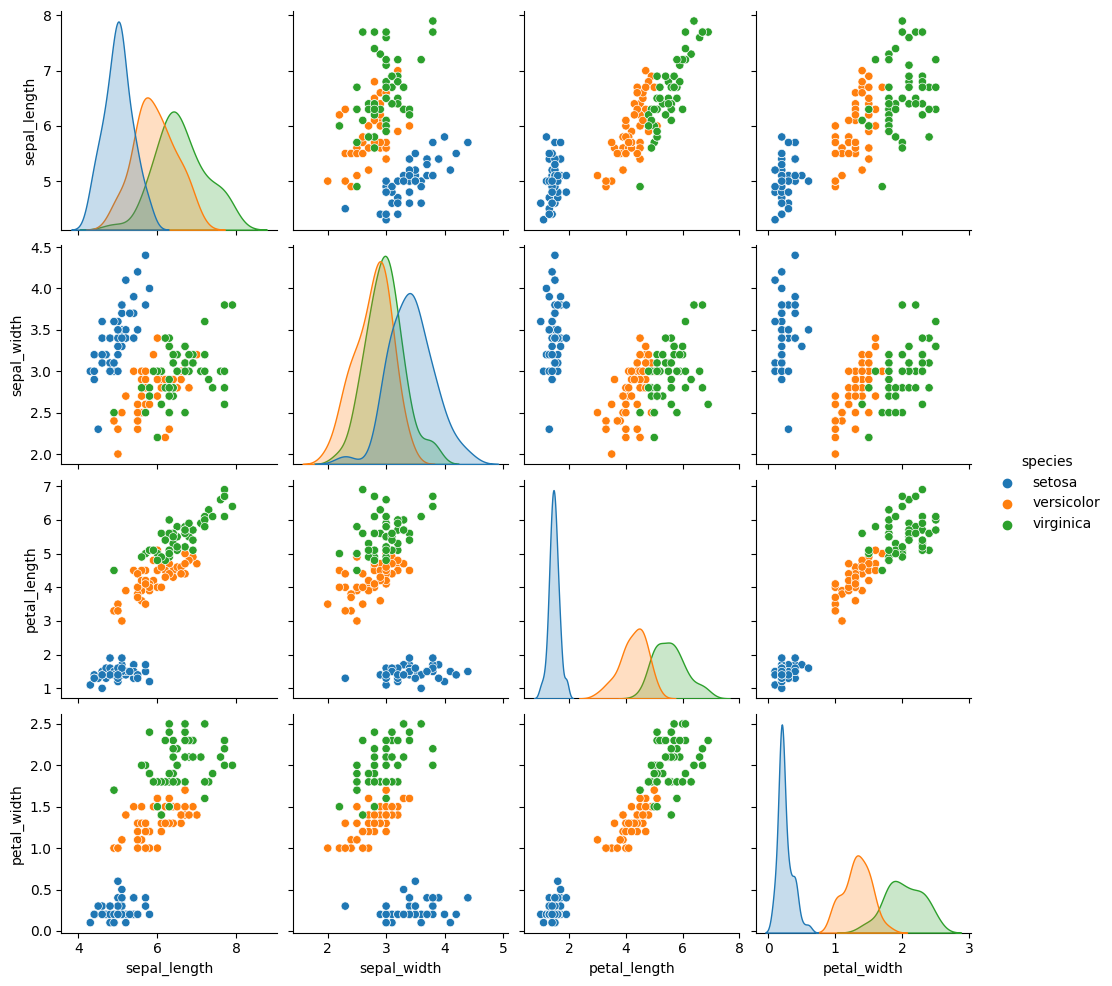

In [104]:
sns.pairplot(iris, hue="species")

### **8- Lineplot** (Numerical - Numerical)

In [105]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [112]:
flights_updated = flights.groupby("year").sum(numeric_only=True).reset_index()

In [114]:
flights_updated

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<AxesSubplot: xlabel='year', ylabel='passengers'>

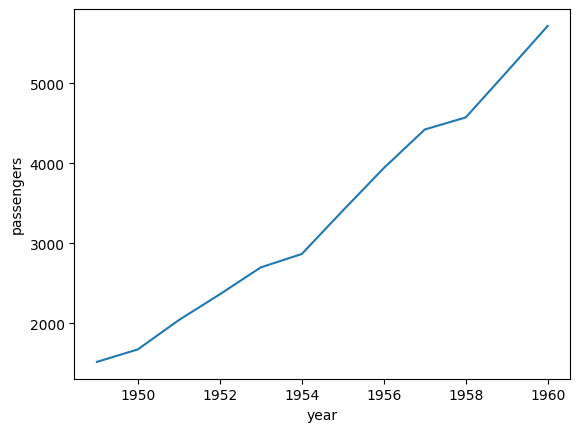

In [115]:
sns.lineplot(x=flights_updated["year"], y=flights_updated["passengers"])

In [116]:
flights.pivot_table(values="passengers", index="month", columns="year")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot: xlabel='year', ylabel='month'>

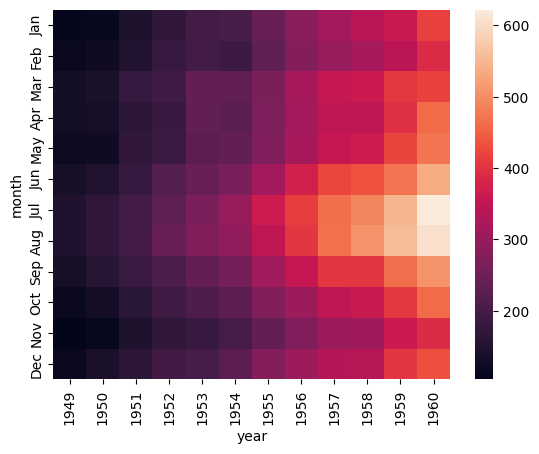

In [117]:
sns.heatmap(flights.pivot_table(values="passengers", index="month", columns="year"))

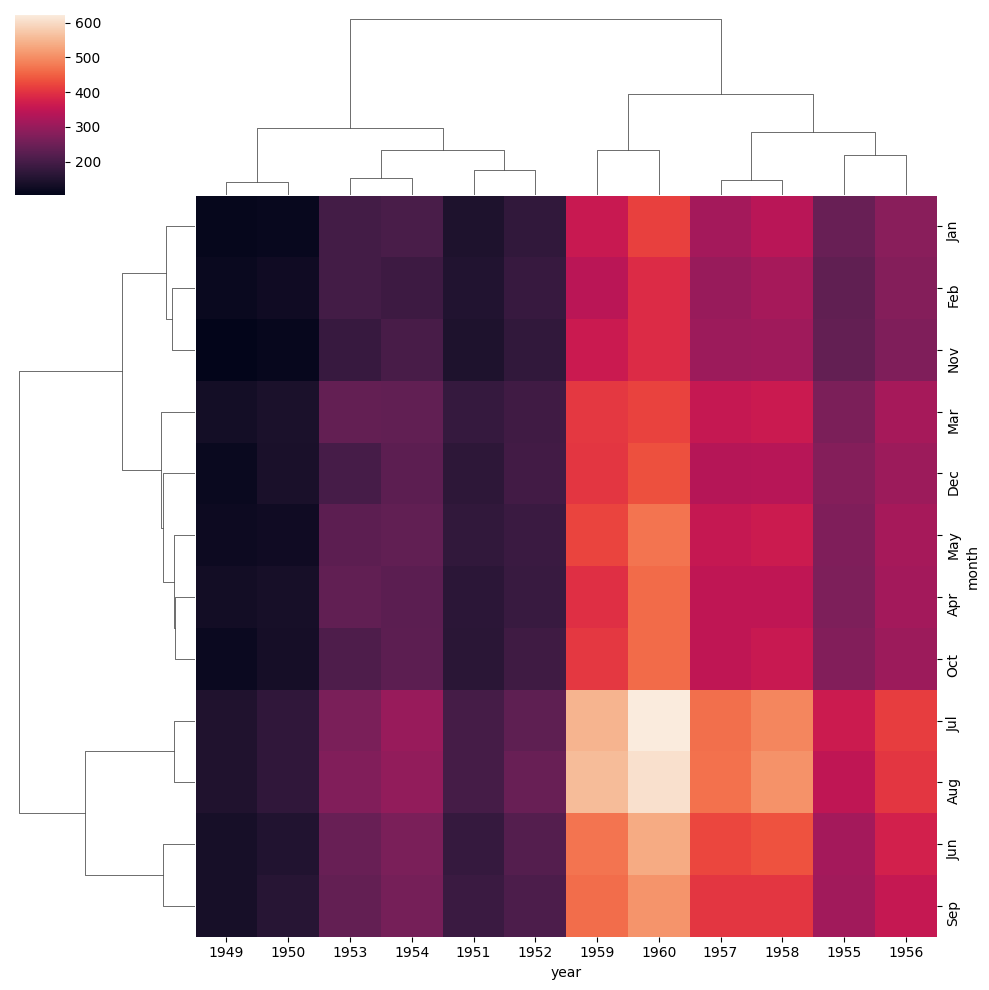

In [118]:
sns.clustermap(flights.pivot_table(values="passengers", index="month", columns="year"))